Car price prediction 
workflow:
1. Data collection
2. Data pre processing
3. Train test split
4. use 2 regression models: Linear & lasso regression model
5. model evaluation 
6. car price production

In [83]:
# libraries needed
import pandas as pd #pandas Dataframe
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

Data collection and processing

In [84]:
# loading dataset into pandas Dataframe
car_dataset = pd.read_csv('car data.csv')

In [85]:
# inspecting first 5 rows of dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [86]:
# checking number of rows and columns
car_dataset.shape

(301, 9)

In [87]:
# very small dataset

In [88]:
# getting information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [89]:
# check for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [90]:
# no missing values

In [91]:
# check the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


encoding categorical data

In [92]:
# convert objects into numberical values

 #encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

 #encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

 #encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [93]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


train test split

In [94]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [95]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [96]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model training

In [98]:
# loading linear regression model
lin_reg_model = LinearRegression()

In [99]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

linear regression model evaluation

In [100]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [101]:
# model evaluation using R squared error 
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8799451660493708


Visualize actual price vs predicted price

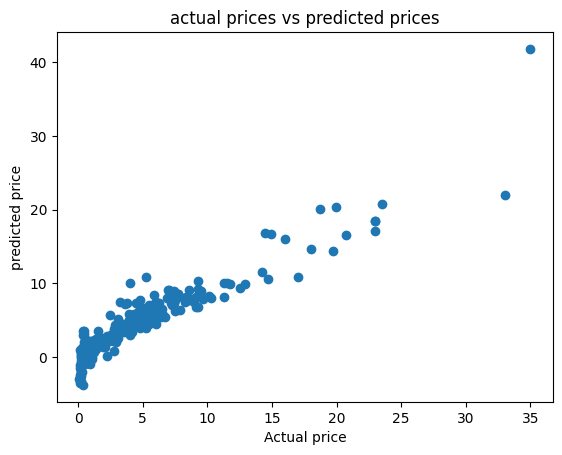

In [102]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [103]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [104]:
# model evaluation using R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8365766715026374


In [105]:
# loading lasso regression model
lin_reg_model = LinearRegression()

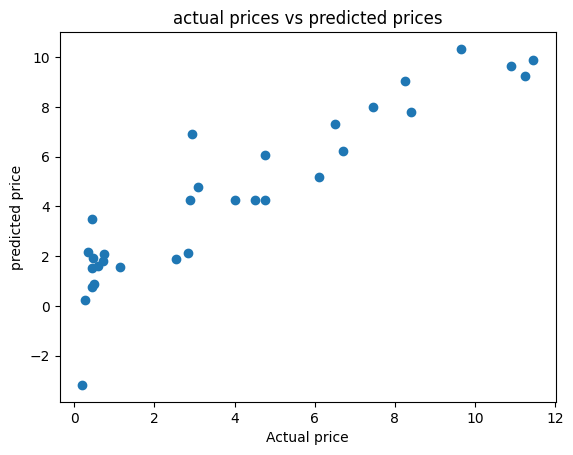

In [106]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

Laso regression model evaluation

In [107]:
lass_reg_model = Lasso()

In [108]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [109]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [110]:
# model evaluation using R squared error 
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8427856123435794


Visualize actual price vs predicted price

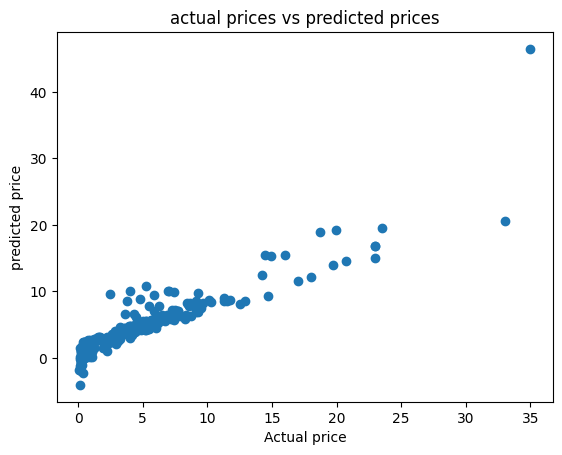

In [111]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [112]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [113]:
# model evaluation using R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173195


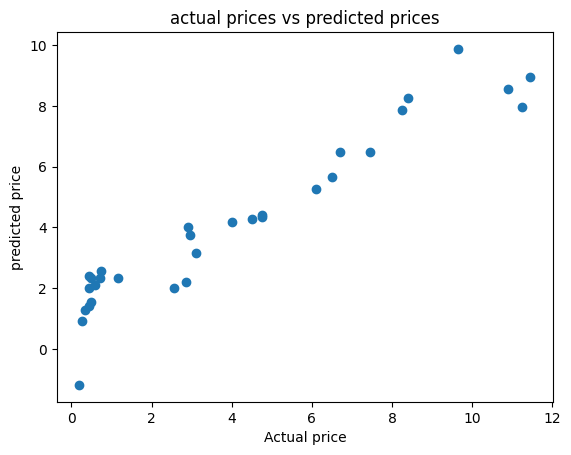

In [114]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

XGBRegressor model evaluation

In [115]:
# loading linear regression model
xgb_reg_model = xgb.XGBRegressor()

In [116]:
xgb_reg_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
# prediction on training data
training_data_prediction = xgb_reg_model.predict(X_train)

In [118]:
# model evaluation using R squared error 
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9999896680984235


Visualize actual price vs predicted price

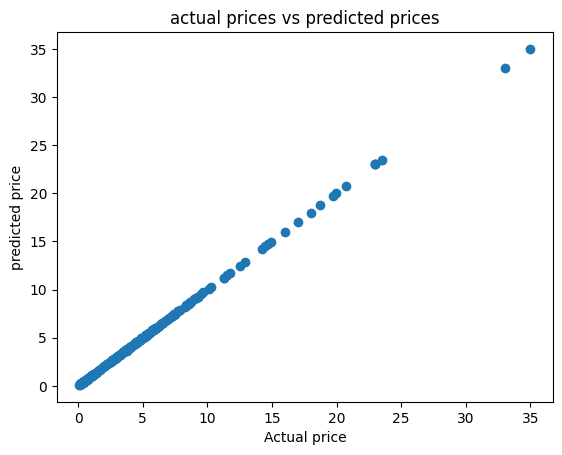

In [119]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [120]:
# prediction on test data
test_data_prediction = xgb_reg_model.predict(X_test)

In [121]:
# model evaluation using R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9807321370840111


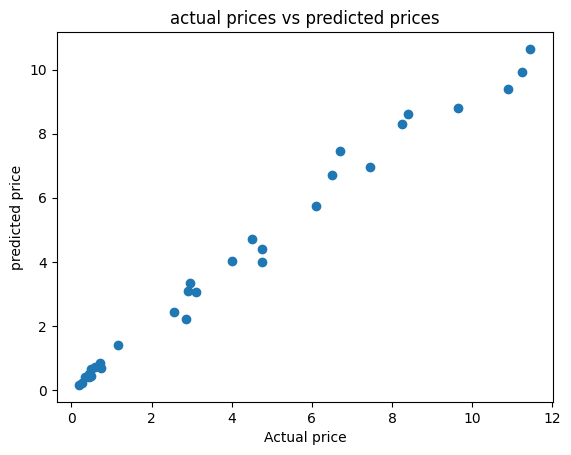

In [122]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [ ]:
Conclusing: 
Linear regression model accuracy using R squared: ~83.7%
Linear regression model accuracy using R squared: ~87.1%
Linear regression model accuracy using R squared: ~98.0%